# Synthetic Image Degradation Analysis

Tests quality assessment methods against controlled synthetic degradations.

**Uses EXACT same methods as pairwise benchmark** (`configs/pairwise_benchmark.test.yaml`)

**Purpose**: Validate methods respond sensibly to known quality changes:
- Gaussian blur (tests sharpness detection)
- Exposure adjustment (tests exposure/histogram quality)  
- JPEG compression (tests artifact detection)

**Expected**: Quality scores decrease monotonically as degradation increases.

## Setup & Configuration

In [ ]:
# ============================================
# ENVIRONMENT VERIFICATION
# ============================================
import sys
from pathlib import Path

# Verify Python environment
print(f"Python executable: {sys.executable}")
print(f"Python version: {sys.version.split()[0]}")
print()

# Verify fivecentplots is available
try:
    import fivecentplots as fcp
    print(f"✓ fivecentplots imported successfully")
    print(f"  Location: {fcp.__file__}")
except ImportError as e:
    print(f"✗ ERROR: fivecentplots not available!")
    print(f"  Current Python: {sys.executable}")
    print()
    print("SOLUTION: Select the correct kernel in VS Code:")
    print("  1. Click on kernel name in top-right of notebook")
    print("  2. Select 'Select Another Kernel'")
    print("  3. Choose the Python interpreter from your venv")
    print("     (Should match the Python where fivecentplots is installed)")
    raise

print()
print("Environment verified ✓")


ModuleNotFoundError: No module named 'fivecentplots'

In [ ]:
# ============================================
# CONFIGURATION - EXACT COPY from pairwise_benchmark.test.yaml
# ============================================
from pathlib import Path

from notebooks.quality_assessment_analysis import PROJECT_ROOT
# Test images from examples/images
TEST_IMAGES = [
    "examples/images/portrait_01.jpg",
    "examples/images/portrait_02.jpg",
    "examples/images/landscape_01.jpg",
    "examples/images/landscape_02.jpg",
    "examples/images/macro_01.jpg",
]
PROJECT_ROOT = '..'
TEST_IMAGES = [Path(path) for path in TEST_IMAGES]

# Degradation levels
BLUR_SIGMAS = [0.5, 1.0, 2.0, 4.0, 8.0]
EXPOSURE_STOPS = [-3, -2, -1, 1, 2, 3]
JPEG_QUALITIES = [95, 80, 60, 40, 20, 10]

# Quality assessment methods - EXACT COPY from configs/pairwise_benchmark.test.yaml
METHODS_TO_TEST = [
    # Rule-based methods (5 methods)
    {'name': 'Sharpness', 'type': 'rule_based', 'weights': {'sharpness': 1.0, 'exposure': 0.0, 'colorfulness': 0.0, 'contrast': 0.0}},
    {'name': 'Exposure', 'type': 'rule_based', 'weights': {'sharpness': 0.0, 'exposure': 1.0, 'colorfulness': 0.0, 'contrast': 0.0}},
    {'name': 'Contrast', 'type': 'rule_based', 'weights': {'sharpness': 0.0, 'exposure': 0.0, 'colorfulness': 0.0, 'contrast': 1.0}},
    {'name': 'Colorfulness', 'type': 'rule_based', 'weights': {'sharpness': 0.0, 'exposure': 0.0, 'colorfulness': 1.0, 'contrast': 0.0}},
    {'name': 'Combined-RuleBased', 'type': 'rule_based', 'weights': {'sharpness': 0.4, 'exposure': 0.3, 'colorfulness': 0.2, 'contrast': 0.1}},

    # CLIP methods with attribute-specific prompts (7 methods)
    {'name': 'CLIP-Aesthetic-Overall', 'type': 'clip_aesthetic', 'model_name': 'ViT-B-32', 'device': 'cpu', 'aggregation_method': 'contrastive_only', 'custom_prompts': {'contrastive': ['a highly aesthetic, visually pleasing, beautiful photograph', 'an unattractive, poorly composed, ugly photograph'], 'positive': [], 'negative': []}},
    {'name': 'CLIP-Composition', 'type': 'clip_aesthetic', 'model_name': 'ViT-B-32', 'device': 'cpu', 'aggregation_method': 'contrastive_only', 'custom_prompts': {'contrastive': ['a well-composed photograph with excellent visual balance', 'a poorly-composed photograph with bad visual balance'], 'positive': [], 'negative': []}},
    {'name': 'CLIP-Subject-Placement', 'type': 'clip_aesthetic', 'model_name': 'ViT-B-32', 'device': 'cpu', 'aggregation_method': 'contrastive_only', 'custom_prompts': {'contrastive': ['a photo with the subject well placed in the frame', 'a photo with the subject not well placed in the frame'], 'positive': [], 'negative': []}},
    {'name': 'CLIP-Cropping', 'type': 'clip_aesthetic', 'model_name': 'ViT-B-32', 'device': 'cpu', 'aggregation_method': 'contrastive_only', 'custom_prompts': {'contrastive': ['a photo that is well cropped and shows the complete subject', 'a photo that is poorly cropped or cuts off the subject'], 'positive': [], 'negative': []}},
    {'name': 'CLIP-Sharpness', 'type': 'clip_aesthetic', 'model_name': 'ViT-B-32', 'device': 'cpu', 'aggregation_method': 'contrastive_only', 'custom_prompts': {'contrastive': ['a sharp, in-focus photograph with clear details', 'a blurry, out-of-focus photograph with unclear details'], 'positive': [], 'negative': []}},
    {'name': 'CLIP-Exposure', 'type': 'clip_aesthetic', 'model_name': 'ViT-B-32', 'device': 'cpu', 'aggregation_method': 'contrastive_only', 'custom_prompts': {'contrastive': ['a photo with good exposure and lighting', 'a photo with poor exposure, too dark or too bright'], 'positive': [], 'negative': []}},
    {'name': 'CLIP-Color', 'type': 'clip_aesthetic', 'model_name': 'ViT-B-32', 'device': 'cpu', 'aggregation_method': 'contrastive_only', 'custom_prompts': {'contrastive': ['a photo with vibrant, natural colors', 'a photo with dull, washed out colors'], 'positive': [], 'negative': []}},

    # Deep Learning Methods
    {'name': 'NIMA-MobileNet', 'type': 'nima', 'backbone': 'mobilenet_v2', 'device': 'cpu', 'batch_size': 8},
    {'name': 'NIMA-ResNet50', 'type': 'nima', 'backbone': 'resnet50', 'device': 'cpu', 'batch_size': 4},
    {'name': 'MUSIQ', 'type': 'musiq', 'use_pyiqa': True, 'device': 'cpu', 'batch_size': 1},
    {'name': 'CLIP-Aesthetic-LAION', 'type': 'clip_aesthetic', 'variant': 'laion', 'model_name': 'ViT-B-32', 'device': 'cpu'},
]

# Device (can change to 'cuda' for GPU)
DEVICE = 'cpu'

# Output directory
OUTPUT_DIR = project_root / 'outputs' / 'degradation_analysis'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print(f"Configuration:")
print(f"  Test images: {len(TEST_IMAGES)}")
print(f"  Methods: {len(METHODS_TO_TEST)}")
print(f"  Device: {DEVICE}") 
print(f"  Output: {OUTPUT_DIR}")

Configuration:
  Test images: 5
  Methods: 15
  Device: cpu
  Output: D:\sim-bench\outputs\degradation_analysis


## Generate Degradations

In [ ]:
if not TEST_IMAGES:
    print("⚠️ WARNING: No test images provided!")
    print("Please add image paths to TEST_IMAGES list in the configuration cell above.")
else:
    # Create timestamped output directory
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    degradation_dir = OUTPUT_DIR / f'degradations_{timestamp}'
    degradation_dir.mkdir(parents=True, exist_ok=True)

    print(f"Generating degraded variants in: {degradation_dir}")

    # Create degradation processor
    processor = create_degradation_processor(output_dir=degradation_dir)

    # Generate degradations for each test image
    all_degraded_paths = {}

    for img_path in tqdm(TEST_IMAGES, desc="Generating degradations"):
        img_path = Path(img_path)

        degraded_variants = processor.apply_degradation_suite(
            image_path=img_path,
            blur_sigmas=BLUR_SIGMAS,
            exposure_stops=EXPOSURE_STOPS,
            jpeg_qualities=JPEG_QUALITIES,
            output_base_dir=degradation_dir
        )

        all_degraded_paths[img_path.stem] = degraded_variants

    total_variants = sum(len(v) for v in all_degraded_paths.values())
    print(f"\n✓ Generated {total_variants} total image variants")

Generating degraded variants in: D:\sim-bench\outputs\degradation_analysis\degradations_20251121_105258


Generating degradations:   0%|          | 0/5 [00:00<?, ?it/s]


✓ Generated 90 total image variants


## Quality Assessment

In [ ]:
print("Assessing quality for all degraded variants...")
print(f"Methods: {[m['name'] for m in METHODS_TO_TEST]}")

# Store all results
results = []

# Assess each method
for method_config in tqdm(METHODS_TO_TEST, desc="Testing methods"):
    method_name = method_config['name']
    assessor = create_quality_assessor(method_config)

    # Assess all degraded variants
    for image_name, degraded_paths in all_degraded_paths.items():
        for degradation_name, img_path in tqdm(
            degraded_paths.items(),
            desc=f"{method_name} - {image_name}",
            leave=False
        ):
            score = assessor.assess_image(str(img_path))

            # Parse degradation type and level
            parts = degradation_name.split('_')
            degradation_type = parts[0]
            degradation_level = '_'.join(parts[1:]) if len(parts) > 1 else 'original'

            results.append({
                'image_name': image_name,
                'degradation_type': degradation_type,
                'degradation_level': degradation_level,
                'degradation_full': degradation_name,
                'method': method_name,
                'score': score,
                'file_path': str(img_path)
            })

# Create DataFrame
results_df = pd.DataFrame(results)

# Save results
results_csv = OUTPUT_DIR / f'assessment_results_{timestamp}.csv'
results_df.to_csv(results_csv, index=False)

print(f"\n✓ Completed {len(results)} quality assessments")
print(f"✓ Saved results to: {results_csv}")

Assessing quality for all degraded variants...
Methods: ['Sharpness', 'Exposure', 'Contrast', 'Colorfulness', 'Combined-RuleBased', 'CLIP-Aesthetic-Overall', 'CLIP-Composition', 'CLIP-Subject-Placement', 'CLIP-Cropping', 'CLIP-Sharpness', 'CLIP-Exposure', 'CLIP-Color', 'NIMA-MobileNet', 'NIMA-ResNet50', 'CLIP-Aesthetic-LAION']


Testing methods:   0%|          | 0/15 [00:00<?, ?it/s]

Sharpness - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

Sharpness - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

Sharpness - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

Sharpness - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

Sharpness - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Exposure - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

Exposure - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

Exposure - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

Exposure - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

Exposure - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Contrast - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

Contrast - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

Contrast - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

Contrast - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

Contrast - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Colorfulness - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

Colorfulness - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

Colorfulness - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

Colorfulness - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

Colorfulness - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Combined-RuleBased - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

Combined-RuleBased - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

Combined-RuleBased - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

Combined-RuleBased - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

Combined-RuleBased - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Aesthetic-Overall - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-Overall - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-Overall - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-Overall - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-Overall - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Composition - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Composition - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Composition - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Composition - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Composition - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Subject-Placement - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Subject-Placement - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Subject-Placement - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Subject-Placement - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Subject-Placement - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Cropping - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Cropping - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Cropping - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Cropping - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Cropping - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Sharpness - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Sharpness - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Sharpness - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Sharpness - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Sharpness - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Exposure - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Exposure - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Exposure - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Exposure - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Exposure - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Color - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Color - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Color - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Color - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Color - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-MobileNet - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-MobileNet - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-MobileNet - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-MobileNet - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-MobileNet - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-ResNet50 - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-ResNet50 - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-ResNet50 - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-ResNet50 - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

NIMA-ResNet50 - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]

Loading OpenCLIP: ViT-B-32 (laion2b_s34b_b79k)


CLIP-Aesthetic-LAION - portrait_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-LAION - portrait_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-LAION - landscape_01:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-LAION - landscape_02:   0%|          | 0/18 [00:00<?, ?it/s]

CLIP-Aesthetic-LAION - macro_01:   0%|          | 0/18 [00:00<?, ?it/s]


✓ Completed 1350 quality assessments
✓ Saved results to: D:\sim-bench\outputs\degradation_analysis\assessment_results_20251121_105258.csv


## Analysis: Dose-Response Curves

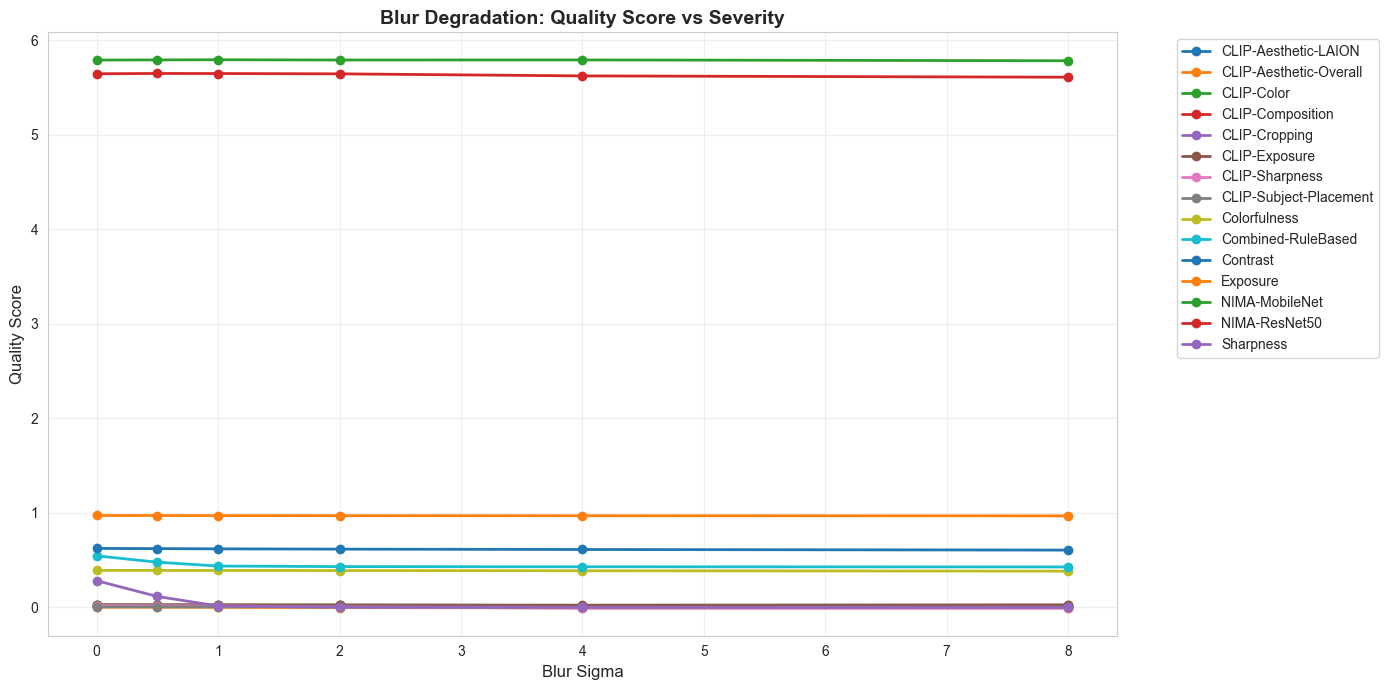

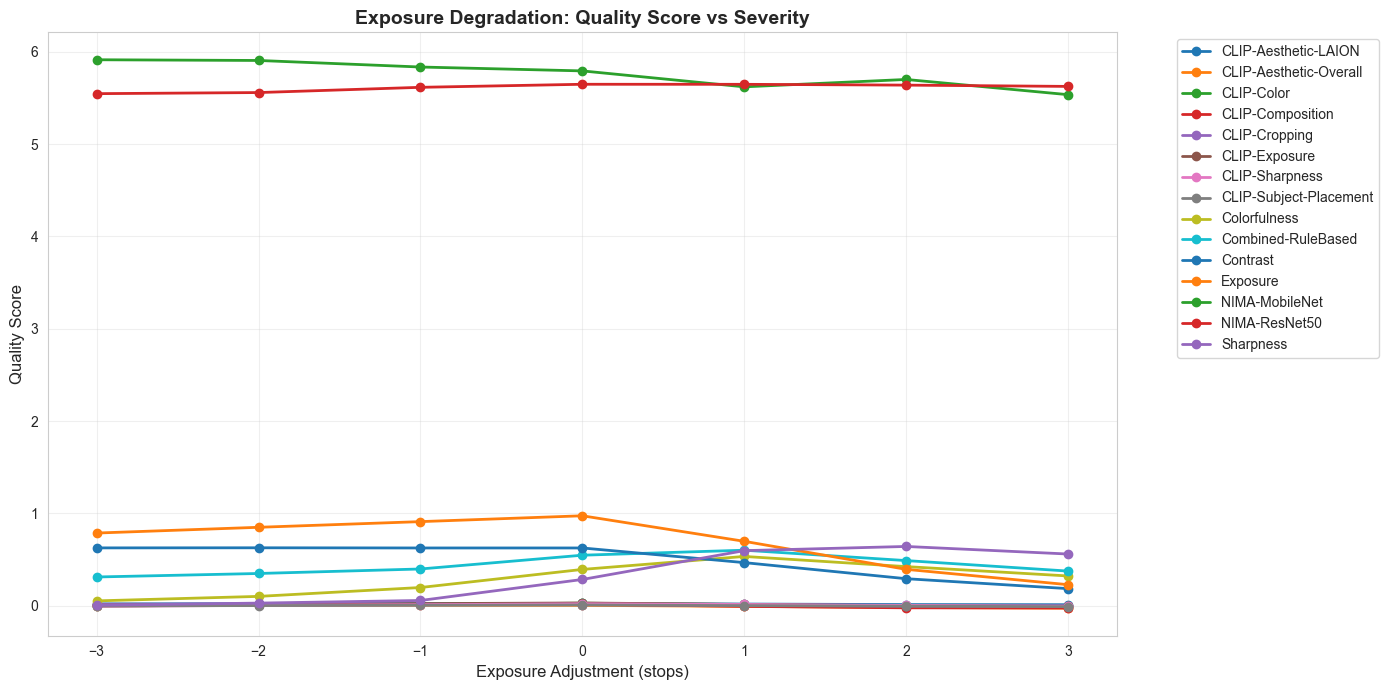

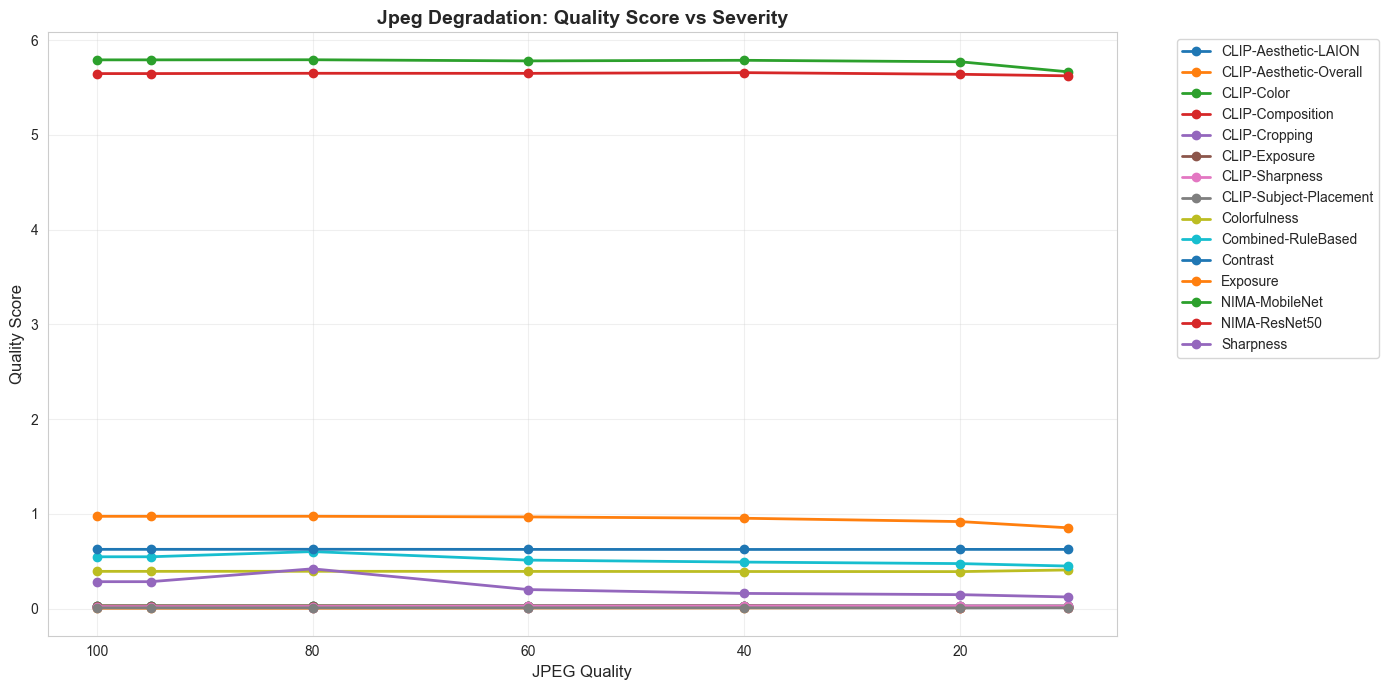

In [ ]:
def plot_dose_response(df, degradation_type):
    """Plot quality score vs degradation level."""
    df_filtered = df[df['degradation_type'] == degradation_type].copy()
    df_original = df[df['degradation_type'] == 'original'].copy()
    df_original['degradation_level'] = '0'
    df_filtered = pd.concat([df_original, df_filtered])

    # Create numeric level
    if degradation_type == 'blur':
        df_filtered['deg_numeric'] = df_filtered['degradation_level'].apply(
            lambda x: 0 if x == '0' else float(x.replace('sigma_', ''))
        )
        xlabel = 'Blur Sigma'
    elif degradation_type == 'exposure':
        df_filtered['deg_numeric'] = df_filtered['degradation_level'].apply(
            lambda x: 0 if x == '0' else float(x.replace('plus_', '').replace('minus_', '-'))
        )
        xlabel = 'Exposure Adjustment (stops)'
    elif degradation_type == 'jpeg':
        df_filtered['deg_numeric'] = df_filtered['degradation_level'].apply(
            lambda x: 100 if x == '0' else float(x.replace('q_', ''))
        )
        xlabel = 'JPEG Quality'

    # Average across images
    df_avg = df_filtered.groupby(['method', 'deg_numeric'])['score'].mean().reset_index()

    # Plot
    plt.figure(figsize=(14, 7))
    for method in df_avg['method'].unique():
        method_data = df_avg[df_avg['method'] == method]
        plt.plot(method_data['deg_numeric'], method_data['score'], 
                marker='o', label=method, linewidth=2, markersize=6)

    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Quality Score', fontsize=12)
    plt.title(f'{degradation_type.title()} Degradation: Quality Score vs Severity', 
             fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.grid(True, alpha=0.3)

    if degradation_type == 'jpeg':
        plt.gca().invert_xaxis()

    plt.tight_layout()
    plt.show()

# Plot for each degradation type
for deg_type in ['blur', 'exposure', 'jpeg']:
    plot_dose_response(results_df, deg_type)

## Summary Statistics

In [ ]:
# Compute score change for each method and degradation type
summary = []

for method in results_df['method'].unique():
    method_df = results_df[results_df['method'] == method]

    original_score = method_df[method_df['degradation_type'] == 'original']['score'].mean()

    for deg_type in ['blur', 'exposure', 'jpeg']:
        deg_scores = method_df[method_df['degradation_type'] == deg_type]['score']
        if len(deg_scores) > 0:
            worst_score = deg_scores.min()
            score_delta = original_score - worst_score

            summary.append({
                'method': method,
                'degradation': deg_type,
                'original_score': original_score,
                'worst_score': worst_score,
                'score_delta': score_delta,
                'sensitivity': 'High' if score_delta > 0.2 else ('Medium' if score_delta > 0.1 else 'Low')
            })

summary_df = pd.DataFrame(summary)

print("\n=== Method Sensitivity Summary ===")
print("\nScore Delta (Original - Worst):")
pivot = summary_df.pivot(index='method', columns='degradation', values='score_delta')
print(pivot.round(3))

print("\n=== Expected Behavior ===")
print("Sharpness method should be most sensitive to blur")
print("Exposure method should be most sensitive to exposure changes")
print("CLIP-Sharpness should detect blur degradation")
print("All methods should show decreasing scores with degradation")


=== Method Sensitivity Summary ===

Score Delta (Original - Worst):
degradation              blur  exposure   jpeg
method                                        
CLIP-Aesthetic-LAION    0.009     0.032  0.007
CLIP-Aesthetic-Overall  0.072     0.090  0.072
CLIP-Color              0.029     0.051  0.034
CLIP-Composition        0.044     0.080  0.041
CLIP-Cropping           0.019     0.038  0.021
CLIP-Exposure           0.010     0.045  0.017
CLIP-Sharpness          0.043     0.045  0.014
CLIP-Subject-Placement  0.015     0.030  0.012
Colorfulness            0.207     0.363  0.202
Combined-RuleBased      0.172     0.452  0.153
Contrast                0.185     0.554  0.160
Exposure                0.009     0.884  0.170
NIMA-MobileNet          0.227     0.453  0.314
NIMA-ResNet50           0.237     0.293  0.258
Sharpness               0.282     0.283  0.279

=== Expected Behavior ===
Sharpness method should be most sensitive to blur
Exposure method should be most sensitive to exposure ch